# Bank Marketing Dataset

### Importing Packages

In [24]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [25]:
df = pd.read_csv('bank.csv',delimiter=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Information about Attributes

In [26]:
df_info = df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


### Describing Dataset
- We are checking for Estimate of location and variablity

In [27]:
df_describe = df.describe()
print(df_describe)

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  


### Splitting into Features and Label

In [28]:
df_features = df.drop('y',axis=1)
df_label = df[['y']]
print(df_features.columns)
print(df_label.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
Index(['y'], dtype='object')


### Information about Feature Columns
- As shown below, We will encode column who has Dtype as Object.

In [29]:
print(df_features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
dtypes: int64(7), object(9)
memory usage: 565.3+ KB
None


### Checking for N-Unique value in Features

In [30]:
df_features_categorical = df_features.select_dtypes(include='object').columns
print(df_features_categorical) # Names of categorical Features columns.
print(df_features[df_features_categorical].nunique()) # Checking for N Number of unique values in only categorical columns.
print(df_features[df_features_categorical].value_counts()) # Acessing each categorical columns values.

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')
job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64
job          marital   education  default  housing  loan  contact    month  poutcome
blue-collar  married   secondary  no       yes      no    unknown    may    unknown     89
management   married   tertiary   no       no       no    cellular   aug    unknown     68
blue-collar  married   primary    no       yes      no    unknown    may    unknown     61
technician   married   secondary  no       no       no    cellular   aug    unknown     44
                                           yes      no    unknown    may    unknown     40
                                                                                        ..
management   divorced  tertiary   yes      no       yes   cellular   nov    unknow

### Checking for N-Unique value in Label

In [31]:
print(df_label['y'].nunique()) # Checking for N Number of unique values in only categorical columns.
print(df_label['y'].value_counts()) # Acessing each categorical columns values.

2
no     4000
yes     521
Name: y, dtype: int64


### Performing Encoding on Categorical Feature columns
- Now as you can see in below output, all those columns who had Dtype as Object now converted as float64

In [32]:
ordinal_encoder = OrdinalEncoder()
df_features[df_features_categorical] = ordinal_encoder.fit_transform(df_features[df_features_categorical])
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int64  
 1   job        4521 non-null   float64
 2   marital    4521 non-null   float64
 3   education  4521 non-null   float64
 4   default    4521 non-null   float64
 5   balance    4521 non-null   int64  
 6   housing    4521 non-null   float64
 7   loan       4521 non-null   float64
 8   contact    4521 non-null   float64
 9   day        4521 non-null   int64  
 10  month      4521 non-null   float64
 11  duration   4521 non-null   int64  
 12  campaign   4521 non-null   int64  
 13  pdays      4521 non-null   int64  
 14  previous   4521 non-null   int64  
 15  poutcome   4521 non-null   float64
dtypes: float64(9), int64(7)
memory usage: 565.3 KB


### Performing Encoding on Categorical Label Column

In [33]:
label_encoder = LabelEncoder()
df_label_encoded = label_encoder.fit_transform(df_label['y'])
df_label_encoded = pd.DataFrame(df_label_encoded,columns=df_label.columns)
print(df_label_encoded.info())
print(df_label_encoded['y'].nunique()) # Checking for N Number of unique values in only categorical columns.
print(df_label_encoded['y'].value_counts()) # Acessing each categorical columns values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       4521 non-null   int32
dtypes: int32(1)
memory usage: 17.8 KB
None
2
0    4000
1     521
Name: y, dtype: int64


### Handling Imbalanced Data
- By checking unique values of Label, We got Category No:4000 (instances) and Category Yes:521 (instances) which can leads us to wrong prediction while we will be building machien learning model. So using RandomSampling technique we are trying to balance the data.

In [34]:
print(len(df_features),len(df_label_encoded))
over_sampler = RandomOverSampler(random_state=42)
X_resampled,y_resampled = over_sampler.fit_resample(X=df_features,y=df_label_encoded)
print(len(X_resampled),len(y_resampled))
df_features_sampled = X_resampled
df_label_sampled = y_resampled
print(len(df_features_sampled),len(df_label_sampled))

4521 4521
8000 8000
8000 8000


### Checking for outliers

<AxesSubplot: >

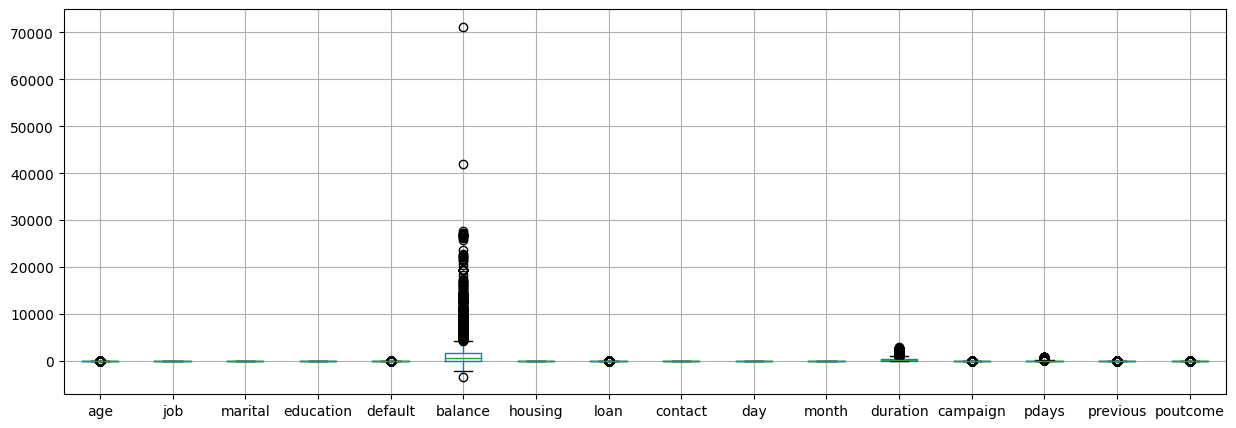

In [35]:
plt.figure(figsize=(15,5))
df_features_sampled.boxplot()

### Removing outliers

In [36]:
Q1 = df_features_sampled.quantile(0.25)
Q3 = df_features_sampled.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

df_features_no_outliers = df_features_sampled[(df_features_sampled >= lower_bound) & (df_features_sampled <= upper_bound)]
print(df_features_no_outliers.head())

    age   job  marital  education  default  balance  housing  loan  contact  \
0  30.0  10.0      1.0        NaN      0.0   1787.0      0.0   0.0      0.0   
1  33.0   7.0      1.0        1.0      0.0      NaN      1.0   NaN      0.0   
2  35.0   4.0      2.0        2.0      0.0   1350.0      1.0   0.0      0.0   
3  30.0   4.0      1.0        2.0      0.0   1476.0      1.0   NaN      NaN   
4   NaN   1.0      1.0        1.0      0.0      0.0      1.0   0.0      NaN   

    day  month  duration  campaign  pdays  previous  poutcome  
0  19.0   10.0      79.0       1.0   -1.0       0.0       3.0  
1  11.0    8.0     220.0       1.0    NaN       NaN       NaN  
2  16.0    NaN     185.0       1.0    NaN       1.0       NaN  
3   3.0    6.0     199.0       4.0   -1.0       0.0       3.0  
4   5.0    8.0     226.0       1.0   -1.0       0.0       3.0  


### Checking for Outliers (After Removed)

<AxesSubplot: >

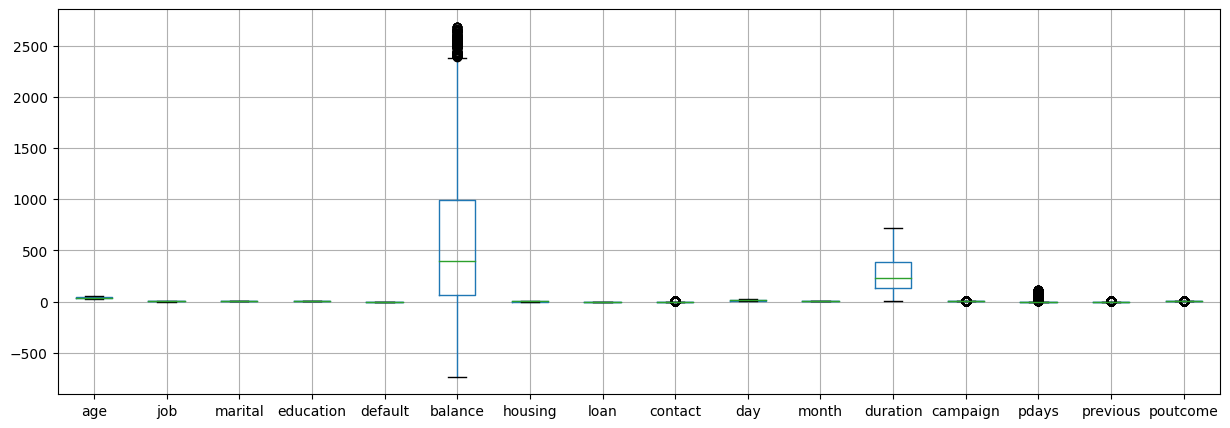

In [37]:
plt.figure(figsize=(15,5))
df_features_no_outliers.boxplot()

### Handling Missing Values
- Finding Missing Values presented inside the Feature columns

In [38]:
imputer = SimpleImputer()
df_features_no_missingVal = imputer.fit_transform(df_features_no_outliers)
df_features_no_missingVal = pd.DataFrame(df_features_no_missingVal,columns=df_features.columns)

### Normalizing the Dataset

In [39]:
minMax_scaler = MinMaxScaler()
df_features_scaled = minMax_scaler.fit_transform(df_features_no_missingVal)
df_features_scaled = pd.DataFrame(df_features_scaled,columns=df_features.columns)
df_final_features = df_features_scaled
df_final_label = df_label_sampled
print(df_final_features.info())
print(df_final_label.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        8000 non-null   float64
 1   job        8000 non-null   float64
 2   marital    8000 non-null   float64
 3   education  8000 non-null   float64
 4   default    8000 non-null   float64
 5   balance    8000 non-null   float64
 6   housing    8000 non-null   float64
 7   loan       8000 non-null   float64
 8   contact    8000 non-null   float64
 9   day        8000 non-null   float64
 10  month      8000 non-null   float64
 11  duration   8000 non-null   float64
 12  campaign   8000 non-null   float64
 13  pdays      8000 non-null   float64
 14  previous   8000 non-null   float64
 15  poutcome   8000 non-null   float64
dtypes: float64(16)
memory usage: 1000.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 1 columns):
 #   Column  Non-N

### Checking for correlation on Features and labels
- After processing correlation we are getting unusual results, changes would be made.

In [40]:
# df_final_features.columns = df_features.columns
# df_final_label.columns = df_label.columns
# plt.figure(figsize=(15,20))
# df_correlations = pd.concat([df_final_features,df_final_label],axis=1)
# df_correlations_Plot = sns.heatmap(df_correlations,annot=True)
# plt.show()

`NOTE:` Apply further preprocessing based on your requirements. visit more: www.github.com/itechdp